In [3]:
import pandas as pd
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [4]:
dataFrame.tail(2)

,Fiyat,BisikletOzellik1,BisikletOzellik2
998,705.802257,1751.349290,1747.484989
999,1048.892414,1748.656426,1752.539962


c:\Users\borte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


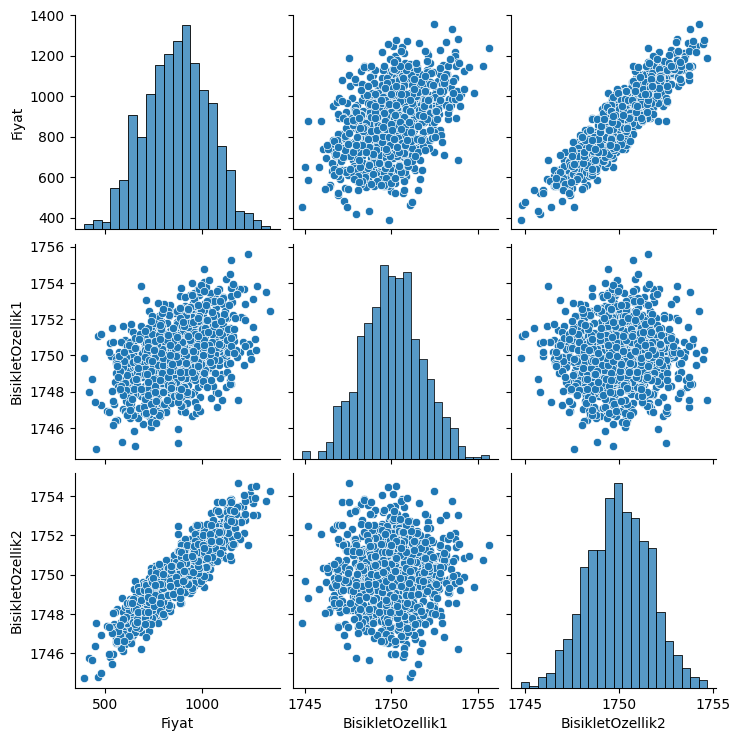

In [5]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.pairplot(dataFrame)

<h3>Veriyi test/train olarak ikiye ayırmak</h3>

In [6]:
from sklearn.model_selection import train_test_split


In [19]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

In [28]:
xTrain, xTest, yTrain, yTest =train_test_split(x,y,test_size=0.33,random_state=15)

<h3>Scaling, normalize etme</h3>

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xTrain)

MinMaxScaler()

In [29]:
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)


In [31]:
xTrain

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [51]:
import tensorflow as tf
from keras.models import Sequential
from  keras.layers import Dense

import keras
model = Sequential() 
model.add(Dense(4, activation="relu",)) # katmanlar ekleniyor
model.add(Dense(6,activation= "relu"))
model.add(Dense(5 , activation= "relu"))
model.add(Dense(1))


In [52]:
model.compile(optimizer="rmsprop",loss="mse") # optimization ve loss function ?

In [53]:
model.fit(xTrain,yTrain,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 812299.7500   
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 780535.0000
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 801359.4375
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 800468.8750
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 787701.3125
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 810679.3750 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 794602.3750
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 786491.1250
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 795223.5625
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 807759.3750
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 786049.2500
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 808144.0000
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 781089.5000
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 959u

In [61]:
loss = model.history.history["loss"] 

<Axes: >

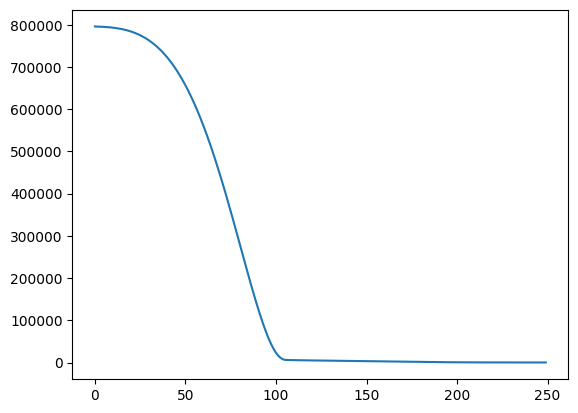

In [62]:
sbn.lineplot(x=range(len(loss)),y =loss)  # Loss 'un son durum grafiği

In [64]:
trainLoss = model.evaluate(xTrain,yTrain)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 73.2379


In [65]:
testLoss = model.evaluate(xTest,yTest) # Evaulate nedir ?

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 75.5994


In [67]:
testTahminleri = model.predict(xTest)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


In [68]:
testTahminleri

array([[1076.0511 ],
       [ 624.3265 ],
       [ 875.25964],
       [ 894.1101 ],
       [ 899.4807 ],
       [ 454.2495 ],
       [ 930.30347],
       [ 990.42474],
       [ 939.5596 ],
       [1015.4248 ],
       [ 750.7184 ],
       [ 916.4252 ],
       [ 946.99225],
       [1052.9506 ],
       [1118.8707 ],
       [ 682.12384],
       [1125.6051 ],
       [ 652.2748 ],
       [1153.1964 ],
       [ 885.67285],
       [ 892.08545],
       [ 716.3899 ],
       [ 457.7076 ],
       [ 613.5215 ],
       [ 834.2074 ],
       [1089.0964 ],
       [ 714.17285],
       [ 757.08923],
       [ 873.234  ],
       [ 770.70557],
       [ 453.2235 ],
       [ 782.5515 ],
       [ 728.49207],
       [ 647.7189 ],
       [ 886.1826 ],
       [ 843.4291 ],
       [1034.0834 ],
       [1021.87646],
       [ 844.2185 ],
       [ 861.8884 ],
       [ 757.0099 ],
       [1172.7687 ],
       [1095.7838 ],
       [1085.9323 ],
       [ 871.7987 ],
       [ 597.3822 ],
       [1144.5073 ],
       [ 972.

In [70]:

tahminDf = pd.DataFrame(yTest,columns=["Gerçek_Y"])

In [71]:
tahminDf

,Gerçek_Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [73]:
testTahminleri = pd.Series(testTahminleri.reshape(330,)) #reshape

In [75]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [76]:
tahminDf

,Gerçek_Y,0
0,1081.652164,1076.051147
1,622.675990,624.326477
2,889.356810,875.259644
3,902.826733,894.110107
4,897.662404,899.480713
...,...,...
325,1028.438035,1011.992188
326,789.934950,791.062744
327,758.490486,765.585938
328,1172.871659,1165.161743


In [77]:
tahminDf.columns =["Gerçek_y","Tahmin_Y"]

<Axes: xlabel='Gerçek_y', ylabel='Tahmin_Y'>

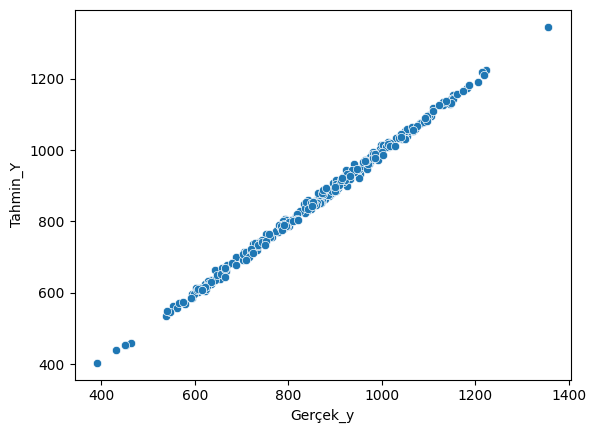

In [80]:
sbn.scatterplot(x = "Gerçek_y",y = "Tahmin_Y",data = tahminDf)

In [ ]:
mean_absolute...